In [1]:
# Dependencies and Setup
%matplotlib inline

import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

drug_clinical_trail=pd.merge(mouse_drug_data,clinical_trial_data, on="Mouse ID")

# Display the data table for preview
drug_clinical_trail.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#mean_tumor_vol =drug_clinical_trail.groupby(['Drug', 'Timepoint']).agg({"Tumor Volume (mm3)":["mean", "sem"]})
mean_tumor_vol =drug_clinical_trail.groupby(['Drug', 'Timepoint']).mean()["Tumor Volume (mm3)"].rename('mean_tumor')
mean_tumor_vol.reset_index()


,Drug,Timepoint,mean_tumor
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [ ]:
# Convert to DataFrame
#mean_tumor_df=pd.DataFrame({'Drug': mean_tumor_vol["Drug"]},{'Timepoint': mean_tumor_vol["Timepoint"]},
                           #'Tumor_vol': mean_tumor_vol['Tumor Volume(mm3)'],
                           # {"Mean_tumor": mean_tumor_vol["mean_tumor"]})
                                                        
#.reset_index(inplace=True)

# Preview DataFrame
#mean_tumor_df

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_tumor_vol =drug_clinical_trail.groupby(['Drug', 'Timepoint']).sem()["Tumor Volume (mm3)"].rename('SE_tumor')
SE_tumor_vol.reset_index()
#std_error_vol=pd.DataFrame(mean_tumor_vol.groupby(["Drug", "Timepoint"]).sem())
                           #.rename("std_error"))
#std_error_vol.reset_index(inplace=True)
#std_error_vol
# Convert to DataFrame

# Preview DataFrame

,Drug,Timepoint,SE_tumor
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
compare_tumor_vol=pd.merge(mean_tumor_vol,SE_tumor_vol, on = ["Drug", "Timepoint"]).round(2)

# Preview that Reformatting worked
compare_tumor_vol.reset_index(inplace=True)
compare_tumor_vol

,Drug,Timepoint,mean_tumor,SE_tumor
0,Capomulin,0,45.00,0.00
1,Capomulin,5,44.27,0.45
2,Capomulin,10,43.08,0.70
3,Capomulin,15,42.06,0.84
4,Capomulin,20,40.72,0.91
...,...,...,...,...
95,Zoniferol,25,55.43,0.60
96,Zoniferol,30,57.71,0.80
97,Zoniferol,35,60.09,0.88
98,Zoniferol,40,62.92,1.00


In [5]:
tumor_vol_df= compare_tumor_vol.pivot(index = "Timepoint", columns="Drug")
tumor_vol_df.head()

mean_tumor                                                        \
Drug       Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                    
0              45.00    45.00     45.00    45.00    45.00   45.00    45.00   
5              44.27    46.50     47.06    47.39    46.80   47.13    47.25   
10             43.08    48.29     49.40    49.58    48.69   49.42    49.10   
15             42.06    50.09     51.30    52.40    50.93   51.36    51.07   
20             40.72    52.16     53.20    54.92    53.64   54.36    53.35   

                                       SE_tumor                              \
Drug      Ramicane Stelasyn Zoniferol Capomulin Ceftamin Infubinol Ketapril   
Timepoint                                                                     
0            45.00    45.00     45.00      0.00     0.00      0.00     0.00   
5            43.94    47.53     46.85      0.45     0.16      0.24     0.26   
10           42.53    49.46     48.69      0.70     0.24      0.28     0.36   
15           41.50    51.53     50.78      0.84     0.33      0.36     0.58   
20           40.24    54.07     53.17      0.91     0.36      0.48     0.73   

                                                                 
Drug      Naftisol Placebo Propriva Ramicane Stelasyn Zoniferol  
Timepoint                                                        
0             0.00    0.00     0.00     0.00     0.00      0.00  
5             0.20    0.22     0.23     0.48     0.24      0.19  
10            0.32    0.40     0.38     0.72     0.43      0.26  
15            0.44    0.61     0.47     0.77     0.49      0.37  
20            0.60    0.84     0.56     0.79     0.62      0.53

In [6]:
tumor_volume=tumor_vol_df.iloc[:,[0,2,3,5,10,12,13,15]]
tumor_volume.unstack

<bound method DataFrame.unstack of           mean_tumor                             SE_tumor                     \
Drug       Capomulin Infubinol Ketapril Placebo Capomulin Infubinol Ketapril   
Timepoint                                                                      
0              45.00     45.00    45.00   45.00      0.00      0.00     0.00   
5              44.27     47.06    47.39   47.13      0.45      0.24     0.26   
10             43.08     49.40    49.58   49.42      0.70      0.28     0.36   
15             42.06     51.30    52.40   51.36      0.84      0.36     0.58   
20             40.72     53.20    54.92   54.36      0.91      0.48     0.73   
25             39.94     55.72    57.68   57.48      0.88      0.55     0.76   
30             38.77     58.30    60.99   59.81      0.93      0.63     0.93   
35             37.82     60.74    63.37   62.42      1.05      0.98     1.13   
40             36.96     63.16    66.07   65.05      1.22      1.06     1.16   
45   

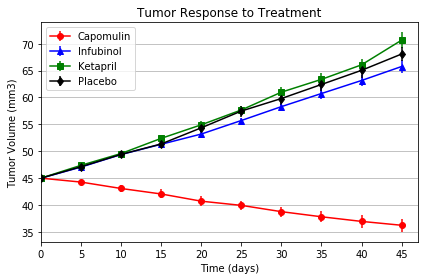

In [8]:
# Generate the Plot (with Error Bars)
ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")


# Plot the 'mean' list vs. the established x axis with error 

capomulin_mean_list=tumor_volume.iloc[:,0]
capomulin_sem_list=tumor_volume.iloc[:,4]
ax.errorbar(x_axis,capomulin_mean_list, yerr=capomulin_sem_list, fmt="red", marker="o",
                   label="Capomulin")

infubinol_mean_list=tumor_volume.iloc[:,1]
infubinol_sem_list=tumor_volume.iloc[:,5]    
ax.errorbar(x_axis,infubinol_mean_list, yerr=infubinol_sem_list, fmt="blue", marker="^",
                   label="Infubinol")

ketapril_mean_list=tumor_volume.iloc[:,2]
ketapril_sem_list=tumor_volume.iloc[:,6]    
ax.errorbar(x_axis,ketapril_mean_list, yerr=ketapril_sem_list, fmt="green", marker="s",
                   label="Ketapril")

placebo_mean_list=tumor_volume.iloc[:,3]
placebo_sem_list=tumor_volume.iloc[:,7]    
ax.errorbar(x_axis,placebo_mean_list, yerr=placebo_sem_list, fmt="black", marker="d",
                   label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('True', which='major', linestyle= 'solid', axis='y', linewidth=0.75)

plt.xlim(0, max(x_axis)+2)
        
plt.tight_layout()

# Save the Figure
plt.savefig("../Images/response_to_treatment_RT.png")

# Show the Figure
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

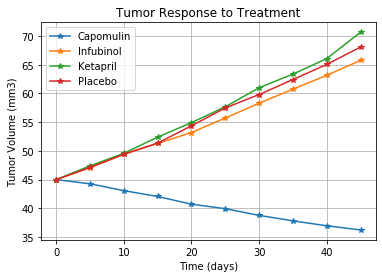

In [7]:
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.plot(tumor_volume.index, tumor_volume.mean_tumor, marker="*")

plt.legend(['Capomulin','Infubinol','Ketapril','Placebo'])
plt.grid(True)
plt.show

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#metastatic_df=drug_clinical_trail.groupby(['Drug', 'Timepoint']).agg({"Metastatic Sites":["mean","sem"]})
#metastatic_df.reset_index(['Timepoint'])
metastatic_sites_vol =drug_clinical_trail.groupby(['Drug', 'Timepoint']).mean()["Metastatic Sites"].rename('Metastatic_mean')
metastatic_sites_vol.reset_index()

,Drug,Timepoint,Metastatic_mean
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [ ]:
# Convert to DataFrame
#metastatic= metastatic_df.pivot(index ='Timepoint', columns='Drug')
#metastatic

# Preview DataFrame

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
SE_met_sites = drug_clinical_trail.groupby(['Drug', 'Timepoint']).sem()["Metastatic Sites"].rename('SE_met_sites')
SE_met_sites.reset_index()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,SE_met_sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [11]:
# Minor Data Munging to Re-Format the Data Frames
compare_Metastatic_df=pd.merge(metastatic_sites_vol,SE_met_sites, on = ["Drug", "Timepoint"]).round(2)

# Preview that Reformatting worked
compare_Metastatic_df.reset_index(inplace=True)


met_sites_df= compare_Metastatic_df.pivot(index = "Timepoint", columns="Drug")
met_sites_df

Metastatic_mean                                               \
Drug            Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
Timepoint                                                                
0                    0.00     0.00      0.00     0.00     0.00    0.00   
5                    0.16     0.38      0.28     0.30     0.26    0.38   
10                   0.32     0.60      0.67     0.59     0.52    0.83   
15                   0.38     0.79      0.90     0.84     0.86    1.25   
20                   0.65     1.11      1.05     1.21     1.15    1.53   
25                   0.82     1.50      1.28     1.63     1.50    1.94   
30                   1.09     1.94      1.59     2.06     2.07    2.27   
35                   1.18     2.07      1.67     2.29     2.27    2.64   
40                   1.38     2.36      2.10     2.73     2.47    3.17   
45                   1.48     2.69      2.11     3.36     2.54    3.27   

                                               SE_met_sites           \
Drug      Propriva Ramicane Stelasyn Zoniferol    Capomulin Ceftamin   
Timepoint                                                              
0             0.00     0.00     0.00      0.00         0.00     0.00   
5             0.32     0.12     0.24      0.17         0.07     0.11   
10            0.57     0.25     0.48      0.50         0.13     0.15   
15            0.76     0.33     0.78      0.81         0.13     0.18   
20            1.00     0.35     0.95      1.29         0.16     0.24   
25            1.36     0.65     1.16      1.69         0.18     0.26   
30            1.62     0.78     1.39      1.93         0.17     0.25   
35            2.30     0.95     1.56      2.29         0.17     0.27   
40            2.78     1.10     1.58      2.79         0.18     0.29   
45            2.57     1.25     1.73      3.07         0.20     0.29   

                                                                          \
Drug      Infubinol Ketapril Naftisol Placebo Propriva Ramicane Stelasyn   
Timepoint                                                                  
0              0.00     0.00     0.00    0.00     0.00     0.00     0.00   
5              0.09     0.10     0.09    0.10     0.10     0.07     0.09   
10             0.16     0.14     0.16    0.12     0.11     0.09     0.12   
15             0.19     0.19     0.16    0.19     0.14     0.12     0.15   
20             0.23     0.24     0.18    0.23     0.17     0.12     0.20   
25             0.27     0.29     0.19    0.26     0.20     0.12     0.22   
30             0.23     0.35     0.27    0.30     0.27     0.14     0.23   
35             0.22     0.36     0.33    0.34     0.37     0.15     0.24   
40             0.31     0.32     0.32    0.30     0.43     0.16     0.31   
45             0.31     0.28     0.35    0.30     0.43     0.19     0.36   

                     
Drug      Zoniferol  
Timepoint            
0              0.00  
5              0.08  
10             0.11  
15             0.11  
20             0.17  
25             0.24  
30             0.25  
35             0.29  
40             0.30  
45             0.29

In [12]:
metastatic_mean_df=met_sites_df.iloc[:,[0,2,3,5]]
metastatic_mean_df

Metastatic_mean                           
Drug            Capomulin Infubinol Ketapril Placebo
Timepoint                                           
0                    0.00      0.00     0.00    0.00
5                    0.16      0.28     0.30    0.38
10                   0.32      0.67     0.59    0.83
15                   0.38      0.90     0.84    1.25
20                   0.65      1.05     1.21    1.53
25                   0.82      1.28     1.63    1.94
30                   1.09      1.59     2.06    2.27
35                   1.18      1.67     2.29    2.64
40                   1.38      2.10     2.73    3.17
45                   1.48      2.11     3.36    3.27

In [13]:

metastatic_SE_df=met_sites_df.iloc[:,[10,12,13,15]]
metastatic_SE_df
#meta_site_pivot=metastatic_SE_df.pivot(values =SE_met_sites, index=[":,0"], columns="Drugs")
#meta_site_pivot

SE_met_sites                           
Drug         Capomulin Infubinol Ketapril Placebo
Timepoint                                        
0                 0.00      0.00     0.00    0.00
5                 0.07      0.09     0.10    0.10
10                0.13      0.16     0.14    0.12
15                0.13      0.19     0.19    0.19
20                0.16      0.23     0.24    0.23
25                0.18      0.27     0.29    0.26
30                0.17      0.23     0.35    0.30
35                0.17      0.22     0.36    0.34
40                0.18      0.31     0.32    0.30
45                0.20      0.31     0.28    0.30

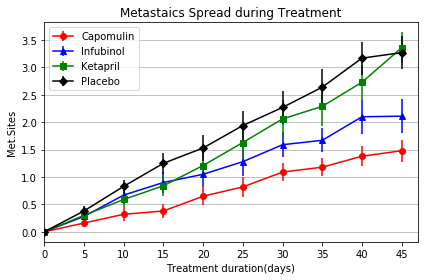

In [14]:
# Generate the Plot (with Error Bars)
ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Metastaics Spread during Treatment")
plt.xlabel("Treatment duration(days)")
plt.ylabel("Met.Sites")



# Plot the 'mean' list vs. the established x axis with error 

capomulin_metmean_list=metastatic_mean_df.iloc[:,0]
capomulin_metsem_list=metastatic_SE_df.iloc[:,0]
ax.errorbar(x_axis,capomulin_metmean_list, yerr=capomulin_metsem_list, fmt="red", marker="o",
                   label="Capomulin")

infubinol_metmean_list=metastatic_mean_df.iloc[:,1]
infubinol_metsem_list=metastatic_SE_df.iloc[:,1]    
ax.errorbar(x_axis,infubinol_metmean_list, yerr=infubinol_metsem_list, fmt="blue", marker="^",
                   label="Infubinol")

ketapril_metmean_list=metastatic_mean_df.iloc[:,2]
ketapril_metsem_list=metastatic_SE_df.iloc[:,2]    
ax.errorbar(x_axis,ketapril_metmean_list, yerr=ketapril_metsem_list, fmt="green", marker="s",
                   label="Ketapril")

placebo_metmean_list=metastatic_mean_df.iloc[:,3]
placebo_metsem_list=metastatic_SE_df.iloc[:,3]    
ax.errorbar(x_axis,placebo_metmean_list, yerr=placebo_metsem_list, fmt="black", marker="D",
                   label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('True', which='major', linestyle= 'solid', axis='y', linewidth=0.75)

plt.xlim(0, max(x_axis)+2)
        
plt.tight_layout()

# Save the Figure
plt.savefig("../Images/Metsastatic_Spread_RT.png")

# Show the Figure
plt.show()



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = pd.DataFrame(drug_clinical_trail.groupby(['Drug','Timepoint'])['Mouse ID'].count().rename('Mouse count'))
mouse_count.reset_index(inplace=True)
mouse_count
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [16]:
# Minor Data Munging to Re-Format the Data Frames

#mouse_count_df=mouse_count.drop(mouse_count.loc["Ceftamin","Naftisol","Propriva","Ramicane","Stelasyn","Zoniferol", :], axis=0)

mouse_count_df= mouse_count.pivot(index = "Timepoint", columns="Drug")
#mouse_count_df= mouse_count.pivot(index = "Drug", columns="Timepoint")
#mouse_count_df.reset_index(inplace=True)
#mouse_count_df.unstack
mouse_count_df

Mouse count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [17]:
# Minor Data Munging to Re-Format the Data Frames

#mouse_count_treat= mouse_count_df.drop(mouse_count_df.iloc[:,[2,5,7,8,9,10]], inplace = True, axis = 1)
#mouse_count_treat=mouse_count_df.drop(["Ceftamin","Naftisol","Propriva","Ramicane","Stelasyn","Zoniferol"], axis=1)
#mouse_count_df.drop([9], inplace=True)

mouse_count_treat=mouse_count_df.iloc[:,[0,2,3,5,]]
mouse_count_treat.reset_index()

# Preview the Data Frame
#survived_mouse_count=mouse_count_df.pivot(index="Timepoint", columns="Drugs")
#survived_mouse_count

Timepoint Mouse count                           
Drug             Capomulin Infubinol Ketapril Placebo
0            0          25        25       25      25
1            5          25        25       23      24
2           10          25        21       22      24
3           15          24        21       19      20
4           20          23        20       19      19
5           25          22        18       19      17
6           30          22        17       18      15
7           35          22        12       17      14
8           40          21        10       15      12
9           45          21         9       11      11

In [20]:

#for ind, row in mouse_count_treat.iterrows():
   #mouse_count_treat.iloc[ind, "pcount","pcount","pcount","pcount"]=row[:,1:4]/25*100


# for key, values in mouse_count_treat.iterrows():
#     print(key,values/25*100)
    
survival_df=mouse_count_treat.iloc[:, :].apply(lambda x: x/25*100)
survival_df

Mouse count                           
Drug        Capomulin Infubinol Ketapril Placebo
Timepoint                                       
0               100.0     100.0    100.0   100.0
5               100.0     100.0     92.0    96.0
10              100.0      84.0     88.0    96.0
15               96.0      84.0     76.0    80.0
20               92.0      80.0     76.0    76.0
25               88.0      72.0     76.0    68.0
30               88.0      68.0     72.0    60.0
35               88.0      48.0     68.0    56.0
40               84.0      40.0     60.0    48.0
45               84.0      36.0     44.0    44.0

TypeError: 'type' object is not subscriptable

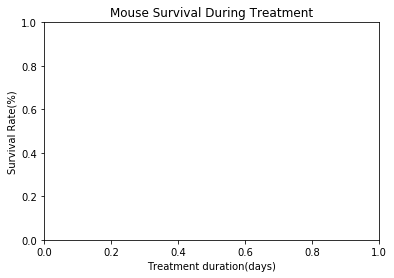

In [41]:
# Generate the Plot (Accounting for percentages)
ax = plt.subplot(111)

# Set the x axis from 0 to 45 in increments of 5
x_axis = np.arange(0, 50, 5)

# Set the plot title and axes titles
plt.title("Mouse Survival During Treatment")
plt.xlabel("Treatment duration(days)")
plt.ylabel("Survival Rate(%)")


# Plot 

capomulin_percent_list=survival_df.iloc(int[":,0"])
ax.errorbar(x_axis,capomulin_percent_list, color="red", marker="o",label="Capomulin")

infubinol_percent_list=survival_df.iloc(int[":,1"])
ax.errorbar(x_axis,infubinol_percent_list, color="blue", marker="^", label="Infubinol")

ketapril_percent_list=survival_df.iloc(int[":,2"])
ax.errorbar(x_axis,ketapril_percent_list, color="green", marker="s", label="Ketapril")

placebo_percent_list=survival_df.iloc(int[":,3"])
ax.errorbar(x_axis,placebo_percent_list, color="black", marker="D", label="Placebo")

# Add the legend and gridlines
ax.legend(loc=2)

tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)
ax.grid('True', which='major', linestyle= 'solid', axis='y', linewidth=0.75)

plt.xlim(0, max(x_axis)+2)
        
plt.tight_layout()

# Save the Figure
plt.savefig("../Images/Metsastatic_Spread_RT.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [42]:
# Calculate the percent changes for each drug
capomulin_perchange = int(((capomulin_mean_list[-1] - capomulin_mean_list[0])/capomulin_mean_list[0])*100)
infubinol_perchange = int(((infubinol_mean_list[-1] - infubinol_mean_list[0])/infubinol_mean_list[0])*100)
ketapril_perchange = int(((ketapril_mean_list[-1] - ketapril_mean_list[0])/ketapril_mean_list[0])*100)
placebo_perchange = int(((placebo_mean_list[-1] - placebo_mean_list[0])/placebo_mean_list[0])*100)

# Display the data to confirm


KeyError: -1

In [45]:
# Store all Relevant Percent Changes into a Tuple
mean_tumor_vol =drug_clinical_trail.groupby(['Drug', 'Timepoint']).mean()["Tumor Volume (mm3)"]
summary_tumor_change['change']=(mean_tumor_vol['Tumor Volume (mm3)'][45]-mean_tumor_vol['Tumor Volume (mm3)'][0])/mean_tumor_vol['Tumor Volume (mm3)'][0]
summary_tumor_change = summary_tumor_change['change'][drugs]
summary_tumor_change

KeyError: 'Tumor Volume (mm3)'

In [ ]:
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes

color = []
for drug in summary_tumor_change:
    if drug<=0:
        color.append('green')
    else:
        color.append('red')
        
# Call functions to implement the function calls
plt.figure(figsize=(10,5))
x_axis = np.arange(len(summary_tumor_change.index))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis,summary_tumor_change*100,align="edge",alpha=0.5,color=color)
plt.xticks(tick_locations,summary_tumor_change.index , rotation="vertical")
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel('Tumor Volume Change')
plt.xlabel('Drug')
plt.tight_layout()
plt.show()

# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)